# 综合项目实战_Python数据分析：前程无忧数据分析师招聘信息分析
# ——基于爬虫、Panads、MatplotLib、PyEcharts 等技术实现

## 一、数据收集

### 1.1、利用爬虫在网页分别获取北京、上海、广州和深圳的 [数据分析师] 招聘数据

#### 1.1.1 导入所需要的模块

In [87]:
from bs4 import BeautifulSoup
import requests
import csv
import pymysql

#### 1.1.2 主程序

In [88]:
#解析网页数据
def get_html(url):
    #发送请求并获取响应结果
    r=requests.get(url)
    r.encoding='gbk'
    #返回获得的整个网页
    return r.text

#获取每个职位的链接
def get_data(html):
    soup=BeautifulSoup(html,'html.parser')
    # 获取链接
    messages=soup.find('div',attrs={'class':'dw_table'})
    contents=messages.find_all('div',attrs={'class':'el'})
    # 链接列表
    links_content=[]
    # 清理出链接
    for i in contents:
        links=i.find('span').find('a')
        try:
            link=links['href']
            links_content.append(link)
        except:
            pass

    # 进入子链接获取需要的信息
    for link_one in links_content:
        #设置休息时间
        # time.sleep(2)
        # 获取网页信息
        html_2=get_html(link_one)
        soup_2=BeautifulSoup(html_2,'html.parser')

        # 职位
        try:
            Title=soup_2.find('div',attrs={'class':'cn'}).find('h1')['title']
        except:
            Title=' '
        # 公司
        try:
            Company=soup_2.find('div',attrs={'class':'cn'}).find('a')['title']
        except:
            Company=' '
        try:
            msg=soup_2.find('div',attrs={'class':'cn'}).find_all('p')[-1]['title']
            info=msg.split('  |  ')[:5]
            # 工作地点
            Positions = info[0]
            # 经验
            Experience = info[1]
            # 学历
            if len(info) < 5:
                Education = '无要求'
            else:
                Education = info[2]
            # 发布日期
            Dates = info[-1]
            # 招聘人数
            Counts = info[-2]
        except:
            Positions=' '
            Experience=' '
            Counts=' '
            Education=' '
            Dates=''

        # 工资
        try:
            Salary=soup_2.find('div',attrs={'class':'cn'}).find('strong').text
        except:
            Salary=' '
        # 任职要求
        try:
            Requests=soup_2.find('div',attrs={'class':'bmsg job_msg inbox'}).getText()
        except:
            Requests=' '
        # 存放一条数据
        data_1=[Title,Company,Positions,Experience,Education,Counts,Dates,Salary,Requests]
        print(data_1)

        # 添加每一条数据到外层列表
        data.append(data_1)

        # 保存到MySQL

        # 书写sql语句
        sql = "INSERT INTO 51job_Shenzhen_Analysis VALUES('%s','%s','%s','%s','%s','%s','%s','%s')"%(Title, Company, Positions, Experience, Education, Counts, Dates, Salary)
        cursor.execute(sql)
        # 提交操作
        conn.commit()

# 遍历每一页数据
#for i in range(11,17):
    #url='https://search.51job.com/list/040000,000000,0000,00,9,99,%25E6%2595%25B0%25E6%258D%25AE%25E5%2588%2586%25E6%259E%2590%25E5%25B8%2588,2,1.html?lang=c&stype=&postchannel=0000&workyear=99&cotype=99&degreefrom=99&jobterm=99&companysize=99&providesalary=99&lonlat=0%2C0&radius=-1&ord_field=0&confirmdate=9&fromType=&dibiaoid=0&address=&line=&specialarea=00&from=&welfare='.format(i)
    #print('获取到第',i,'页')
    #html=get_html(url)
    #get_data(html)

#### 1.1.3 保存到MySQL数据库

In [89]:
# 连接数据库
#conn=pymysql.connect(host='127.0.01',user='root',password='Admin',db='study_project',charset='gbk')
#print('已连接到MySQL数据库')
# 获取游标
#cursor=conn.cursor()
# 书写sql语句
#sql = "INSERT INTO 51job_Shenzhen_Analysis VALUES('%s','%s','%s','%s','%s','%s','%s','%s')"%(Title, Company, Positions, Experience, Education, Counts, Dates, Salary)
#cursor.execute(sql)
# 提交操作
#conn.commit()
# 关闭sql连接
#cursor.close()
#print('关闭数据库成功')

#### 1.1.3 保存到CSV文件

In [90]:
#with open('Shenzhen_11_16.csv', 'w') as file:
    #data_s = csv.writer(file)
    #data_s.writerow(
            #['Title','Company','Positions','Experience','Education','Counts','Dates','Salary','Requests'])
    #data_s.writerows(data)
#print('保存到CSV文件完成')
#print('任务完成')

### 1.2、查看通过爬虫获取的 [51job.csv] 数据

In [91]:
# 导入模块
import pandas as pd
from pandas import DataFrame,Series

In [92]:
# 查看数据基本信息
data=pd.read_csv('51job.csv')
data.head()

,Title,Company,Positions,Experience,Education,Counts,Dates,Salary,Requests
0,数据分析专员,上海有蓝网络科技有限公司,上海-静安区,无工作经验,大专,招1人,04-12发布,4-6千/月,\n1.负责运营相关数据的收集、整理和维护； 2.日常数据的统计，并形成报表； 3.业务和项...
1,汽车市场数据分析,上海雷神咨询有限公司,上海,5-7年经验,本科,招2人,04-12发布,1-1.5万/月,\nResponsibilities：PDF/PPT version sales repor...
2,Python开发工程师,上海届远信息技术有限公司,上海-宝山区,2年经验,本科,招1人,04-12发布,0.8-1万/月,\n1、根据工程项目需要，整合爬虫、NLP、OCR等开源或外购的组件，进行集成2、配合数据分...
3,数据分析,上海豫园黄金珠宝集团有限公司,上海-浦东新区,2年经验,本科,招1人,04-11发布,6-10万/年,\n 1、负责部门数据跟踪，汇总，管理工作； ...
4,医药分析实习生,灵麦（上海）国际贸易有限公司,上海-黄浦区,无工作经验,无要求,招1人,04-11发布,2-3千/月,"\n\t\t\t\t\t\tWith the business growth, the co..."


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 9 columns):
Title         5541 non-null object
Company       5541 non-null object
Positions     5541 non-null object
Experience    5541 non-null object
Education     5541 non-null object
Counts        5541 non-null object
Dates         5483 non-null object
Salary        5429 non-null object
Requests      5541 non-null object
dtypes: object(9)
memory usage: 389.7+ KB


#### 一共5541条数据，其中发布日期和工资有缺失值

## 二、数据清洗

### 2.1 数据查重

In [94]:
data.duplicated().value_counts()

False    4517
True     1024
dtype: int64

In [95]:
len(data.Company.unique())

2031

In [96]:
len(data.Requests.unique())

4064

#### 可以发现有同一公司发布了关于数据分析师的好几个岗位

###  2.2.1 去除重复项

In [97]:
dt=data.drop_duplicates(subset=None, keep='first', inplace=False)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 5537
Data columns (total 9 columns):
Title         4517 non-null object
Company       4517 non-null object
Positions     4517 non-null object
Experience    4517 non-null object
Education     4517 non-null object
Counts        4517 non-null object
Dates         4516 non-null object
Salary        4405 non-null object
Requests      4517 non-null object
dtypes: object(9)
memory usage: 352.9+ KB


### 2.3 清洗数据格式


### 2.3.1 对地区 [Positions] 列处理

In [98]:
positions_split=dt['Positions'].str.split('-').apply(pd.Series)
ps=positions_split.reset_index()
ps.head()

,index,0,1
0,0,上海,静安区
1,1,上海,NaN
2,2,上海,宝山区
3,3,上海,浦东新区
4,4,上海,黄浦区


In [99]:
ps.columns=['index','positions','ct']
ps.head()

,index,positions,ct
0,0,上海,静安区
1,1,上海,NaN
2,2,上海,宝山区
3,3,上海,浦东新区
4,4,上海,黄浦区


In [100]:
ps_2=ps.drop(['ct'],axis=1)
ps_2.head()

,index,positions
0,0,上海
1,1,上海
2,2,上海
3,3,上海
4,4,上海


In [101]:
# 插入原表
ipc=ps_2.pop('positions')
dt.insert(2,'positions',ipc)
dt.head()

,Title,Company,positions,Positions,Experience,Education,Counts,Dates,Salary,Requests
0,数据分析专员,上海有蓝网络科技有限公司,上海,上海-静安区,无工作经验,大专,招1人,04-12发布,4-6千/月,\n1.负责运营相关数据的收集、整理和维护； 2.日常数据的统计，并形成报表； 3.业务和项...
1,汽车市场数据分析,上海雷神咨询有限公司,上海,上海,5-7年经验,本科,招2人,04-12发布,1-1.5万/月,\nResponsibilities：PDF/PPT version sales repor...
2,Python开发工程师,上海届远信息技术有限公司,上海,上海-宝山区,2年经验,本科,招1人,04-12发布,0.8-1万/月,\n1、根据工程项目需要，整合爬虫、NLP、OCR等开源或外购的组件，进行集成2、配合数据分...
3,数据分析,上海豫园黄金珠宝集团有限公司,上海,上海-浦东新区,2年经验,本科,招1人,04-11发布,6-10万/年,\n 1、负责部门数据跟踪，汇总，管理工作； ...
4,医药分析实习生,灵麦（上海）国际贸易有限公司,上海,上海-黄浦区,无工作经验,无要求,招1人,04-11发布,2-3千/月,"\n\t\t\t\t\t\tWith the business growth, the co..."


In [102]:
dt['positions'].value_counts().head()

广州    1681
北京    1077
上海     944
深圳      58
佛山      17
Name: positions, dtype: int64

In [103]:
# 删除原来数据对应的列
dt.drop(columns=['Positions'], inplace=True)
ct_1 = dt['positions'].apply(pd.Series)
ct_2=ct_1.unstack().dropna().reset_index()
ct_2.columns=['level_0','level_1','city']
ct_2['city'] = ct_2['city'].str.strip()
ct_3= ct_2.groupby('city').count()
ct_4= ct_3.drop(['level_0'], axis = 1)
ct_4.columns = ['counts']
ct_4.head()

/Users/jeffrey/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,counts
city,
,1
Positions,1
上海,944
东莞,5
中山,2


### 2.3.2 对工作经验 [Experience] 列处理

In [104]:
dt['Experience'].value_counts()

无工作经验         2357
1年经验           684
3-4年经验         654
2年经验           620
5-7年经验         179
8-9年经验          16
10年以上经验          5
                 1
Experience       1
Name: Experience, dtype: int64

In [345]:
# 对空值和异常值进行代替
dt['Experience']=dt['Experience'].replace([' ','Experience'],'无工作经验')
ex=dt['Experience'].apply(pd.Series)
ex2=ex.unstack().dropna().reset_index()
ex2.columns=['1','num','level']
ex3= ex2.groupby('level').count()
ex4= ex3.drop(['1'], axis = 1)
ex4.columns = ['counts']
ex4

/Users/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,counts
level,
10年以上经验,5
1年经验,684
2年经验,620
3-4年经验,654
5-7年经验,179
8-9年经验,16
无工作经验,2359


### 2.3.3 对学历要求 [Education] 列处理

In [106]:
dt['Education'].value_counts()

本科           1978
大专           1013
无要求           848
高中            334
中专            167
硕士            123
中技             28
招1人             8
博士              7
招若干人            3
招3人             2
初中及以下           2
                1
招2人             1
Education       1
招6人             1
Name: Education, dtype: int64

#### 对于显示招聘人数的学历列，由于数据量少，将其替换成无要求

In [330]:
dt['Education']=dt['Education'].replace(['招1人','招若干人','招3人','招2人','招6人',' '],'无要求')
dt['Education'].value_counts()

/Users/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


本科       1978
大专       1013
无要求       865
高中        334
中专        167
硕士        123
中技         28
博士          7
初中及以下       2
Name: Education, dtype: int64

### 2.3.4 对薪资 [Salary] 列处理

In [108]:
# 检查空值
dt['Salary'].isnull().value_counts()

False    4405
True      112
Name: Salary, dtype: int64

In [109]:
# 对空值填充,用0代替
dt['Salary'].fillna(0,inplace=True)
dt['Salary'].isnull().value_counts()

/Users/jeffrey/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


False    4517
Name: Salary, dtype: int64

In [110]:
# 查看数据
dt['Salary'].value_counts().head(10)

6-8千/月        618
0.8-1万/月      573
1-1.5万/月      419
4.5-6千/月      291
1.5-2万/月      181
0.8-1.5万/月    149
1-2万/月        116
0             112
0.6-1万/月      100
8-10万/年        94
Name: Salary, dtype: int64

In [111]:
# 薪资转换成统一单位
li = []

for i in dt['Salary']:

    if str(i)==' ' or str(i)=='0':
        sz_1=0
    elif '千/月' in str(i):
        sz0=i[:-3]
        sz=sz0.split('-')
        si=[float(x) for x in sz]
        sz_1=(si[0]+si[1])/2
    elif '万/月' in str(i):
        sz0 = i[:-3].split('-')
        si = [float(x) for x in sz0]
        sz_1 = (si[0] + si[1]) * 10 / 2
    elif '万/年' in str(i):
        sz0 = i[:-3].split('-')
        si = [float(x) for x in sz0]
        sz_1 = (si[0] + si[1]) * 10 / 12 / 2
    elif '元/天' in str(i):
        sz0 = i[:-3].split('元')
        si = [float(x) for x in sz0]
        sz_1 = (si[0]) * 30 / 1000
    elif '千以下' in str(i):
        sz0 = i[:-3].split('千')
        sz_1 = sz0[0]
    elif '万以下' in str(i):
        sz0 = i[:-3].split('万')
        si = [float(x) for x in sz0[0]]
        sz_1 = si[0] * 10
    else:
        sz_1 = 0
    li.append(sz_1)
len(li)

4517

In [112]:
# 转换数值类型，保留两位小数
dt['Salary']=li
dt['Salary']=dt['Salary'].apply(pd.to_numeric)
dt.loc[dt['Salary']==0.00,'Salary']=dt['Salary'].apply(pd.to_numeric).mean()
dt['Salary']=dt['Salary'].map(lambda x:'%.2f'%x)
dt['Salary'].head()

/Users/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jeffrey/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

0     5.00
1    12.50
2     9.00
3     6.67
4     2.50
Name: Salary, dtype: object

### 2.3.4 对技能要求 [Requests] 列处理

In [113]:
# 载入技能关键词文件
words=pd.read_csv('words.csv')
origin=pd.read_csv('51job.csv')

tup={}

a=0
for j in origin['Requests']:
    for i in words:
        if i in j:
            a += 1
            tup[i]=a

## 三、数据分析

## 3.1、一线城市数据分析师需求量

In [114]:
# 导入所需要的模块
import matplotlib.pyplot as plt

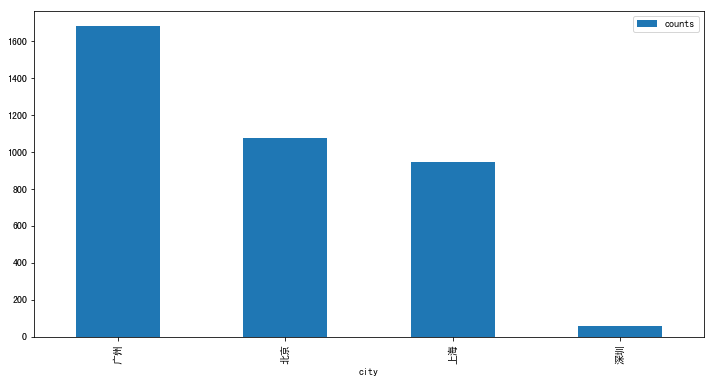

In [162]:
ct_5=ct_4.loc[['上海','北京','广州','深圳']]
ct_5.sort_values(by='counts',ascending=False).head().plot(kind ='bar', figsize = (12,6))
plt.show()

*** 结论 *** 
- 在前程无忧网站上，四个一线城市数据分析师职位广州需求最多，北京其次，上海第三，深圳最少
- 与之前的猜想‘北京最多’不合，分析原网页，广州的招聘信息为42页，北京为25页，上海31页，深圳16页

## 3.2、一线城市数据分析师平均薪资

In [164]:
# 导入pyecharts包
from pyecharts import Bar

In [225]:
ss=dt.groupby(by='positions').mean()
s=ss.loc[['上海','北京','广州','深圳']]
s_2=s.sort_values(by = 'Salary',ascending = False).reset_index()
s_2['Salary']=s_2['Salary'].map(lambda x:'%.2f'%x)
s_2

,positions,Salary,c
0,北京,12.67,1
1,上海,11.55,1
2,广州,10.37,1
3,深圳,8.92,1


In [186]:
# 向图添加参数
attr = s_2['positions'].tolist()
v1 = s_2['Salary'].tolist()
bar=Bar('一线城市平均薪资')
bar.add("城市", attr, v1)
bar

*** 结论 *** 
- 数据分析师薪资北京最高，为12.67K；上海11.55K，广州10.37K，深圳8.92K

## 3.3、学历相关分析

### 3.3.1、各城市对本职位学历的要求

In [241]:
dt['数量']=1
ed=dt.groupby(by=['positions','Education']).sum()
ed_1=ed.loc[['上海','北京','广州','深圳'],['数量']]
ed_1.head()

/Users/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


数量
positions Education     
上海        中专          20
          中技           7
          初中及以下        1
          博士           5
          大专         193

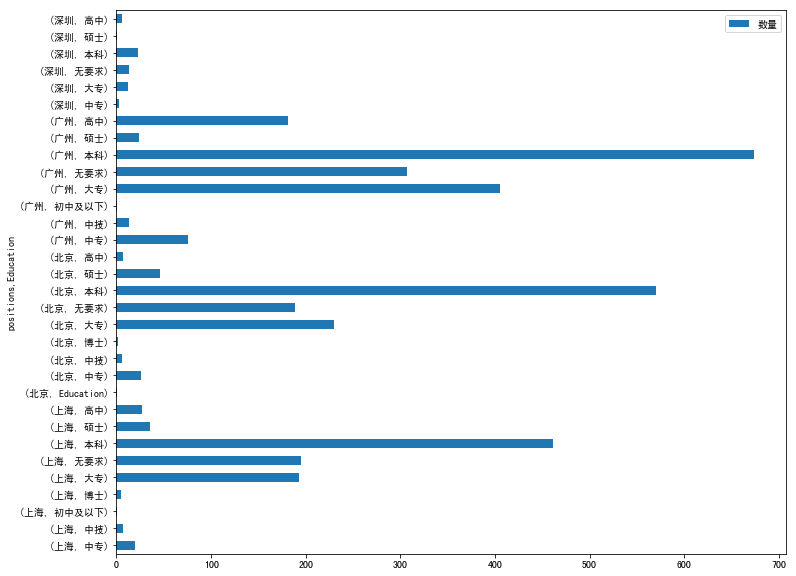

In [254]:
ed_1.sort_values(by = '数量',ascending = False)
ed_1.plot(kind ='barh', figsize = (12,10))
plt.show()

### 3.3.2、不同学历对应平均工资

In [310]:
#导入所需模块
from pyecharts import Line,EffectScatter,Overlap

In [327]:
ed_s=dt.groupby(by=['Education']).mean()
eds=ed_s.loc[['初中及以下','高中','中专','大专','本科','硕士','博士','无要求'],['Salary']]
edd=eds.sort_values(by = 'Salary',ascending = True).reset_index()
edd['Salary']=edd['Salary'].map(lambda x:'%.2f'%x)
edd

,Education,Salary
0,高中,7.44
1,中专,8.05
2,初中及以下,9.00
3,大专,9.10
4,无要求,10.20
5,本科,13.02
6,硕士,14.18
7,博士,16.47


In [328]:
attrs=edd['Education'].tolist()
v1=edd['Salary'].tolist()
line=Line('各学历对应平均工资')
line.add('',attrs,v1,is_value_random=True)
es=EffectScatter()
es.add('',attrs,v1,effect_scale=8)
overlap=Overlap()
overlap.add(line)
overlap.add(es)
overlap

*** 结论 *** 
- 四大一线城市中，对于数据分析师职位，需求量最多的学历是本科，其次是大专，再者是无要求，硕士以及博士的需求量很少
- 学历为高中至无要求区间薪资升幅较为平稳，而无要求至本科区间，薪资升幅明显，本科和硕士相差不大，博士学历对应薪资明显提高

## 3.3、对工作经验要求分析

In [349]:
ex5=ex4.reset_index()
attr=ex5['level'].tolist()
v1=ex5['counts'].tolist()
pie=Pie('工作经验要求',title_pos='center')
pie.add('环形饼图',attr,v1,radius=[40,75],label_text_color=None,is_label_show=True,legend_orient='vertical',legend_pos='left')
pie

*** 结论 *** 
- 对于经验要求，无工作经验超过了一半，这里面也不可排除某些培训机构以公司招聘为名义，培训学员然后与其他公司合作，安排学员去这些公司
- 可以看出招聘者对于1至3年工作经验的需求量比较高，其中1年工作经验需求量最多
- 8年以上工作经验的需求量很小，加起来也没超过1%


## 3.4、技能热度词云图

In [365]:
# 导入所需模块
from pyecharts import WordCloud
import numpy as np


In [352]:
# 从招聘网站上岗位字职责中找出技能关键词
words=pd.read_csv('words.csv')
origin=pd.read_csv('51job.csv')

tup={}

a=0
for j in origin['Requests']:
    for i in words:
        if i in j:
            a += 1
            tup[i]=a

In [392]:
name=tup.keys()
quant=tup.values()
wordcloud=WordCloud(width=950,height=700)
wordcloud.add('',name,quant,word_size_range=[20,50])
wordcloud

## 四、数据分析结论

- 从本次数据分析可看出广州对本职位的需求最大，北京和上海需求量相差不大
- 对于学历要求，本科最多，是第二名大专需求量的2倍左右
- 一线城市数据分析师平均薪资在北京最高为12.7k左右，上海为11.5k
- 大部分公司对于1-3年的数据分析师需求较大
- 技能要求方面，需要掌握Office、R、SAS、SQL、SPSS和Python等，另一方面也要求职者掌握机器学习方面的相关知识